# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city = "city_data.csv"
ride = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)
print(city_df)


                city  driver_count   type
0        Richardfort            38  Urban
1       Williamsstad            59  Urban
2        Port Angela            67  Urban
3         Rodneyfort            34  Urban
4        West Robert            39  Urban
..               ...           ...    ...
115     Bradshawfurt             7  Rural
116     New Ryantown             2  Rural
117   Randallchester             9  Rural
118      Jessicaport             1  Rural
119  South Saramouth             7  Rural

[120 rows x 3 columns]


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [4]:
#  1. Get the total rides for each city type
x = pyber_data_df.groupby('type')
print(x.count())
totalRides = ['1625', '625', '125']
    

          city  date  fare  ride_id  driver_count
type                                             
Rural      125   125   125      125           125
Suburban   625   625   625      625           625
Urban     1625  1625  1625     1625          1625


In [5]:

# 2. Get the total drivers for each city type
totalDrivers = []

urban = city_df.loc[city_df['type'] == 'Urban']
driverUrban = sum(urban['driver_count'])
totalDrivers.append(driverUrban)

sub = city_df.loc[city_df['type'] == 'Suburban']
driverSub = sum(sub['driver_count'])
totalDrivers.append(driverSub)

rural = city_df.loc[city_df['type'] == "Rural"]
driverRural = sum(rural['driver_count'])
totalDrivers.append(driverRural)

print("total number of drivers in Urban areas: " + str(driverUrban))
print("total number of drivers in Suburban areas: " + str(driverSub))
print("total number of drivers in Rurual areas: " + str(driverRural))
print(totalDrivers)


total number of drivers in Urban areas: 2405
total number of drivers in Suburban areas: 490
total number of drivers in Rurual areas: 78
[2405, 490, 78]


In [6]:
#  3. Get the total amount of fares for each city type
totalFares = []
urban = pyber_data_df.loc[pyber_data_df['type'] == 'Urban']
j = sum(urban['fare'])
totalFares.append(j)
sub = pyber_data_df.loc[pyber_data_df['type'] == 'Suburban']
x = sum(sub['fare'])
totalFares.append(x)
rural = pyber_data_df.loc[pyber_data_df['type'] == "Rural"]
h = sum(rural['fare'])
totalFares.append(h)
print("total number of fare in Urban areas: " + str(j))
print("total number of fare in Suburban areas: " + str(x))
print("total number of fare in Rurual areas: " + str(h))
print(totalFares)

total number of fare in Urban areas: 39854.380000000085
total number of fare in Suburban areas: 19356.330000000013
total number of fare in Rurual areas: 4327.930000000002
[39854.380000000085, 19356.330000000013, 4327.930000000002]


In [7]:
#  4. Get the average fare per ride for each city type. 
averageFare = []
urban = pyber_data_df.loc[pyber_data_df['type'] == 'Urban']
j = sum(urban['fare'])/len(urban['fare'])
averageFare.append(j)
sub = pyber_data_df.loc[pyber_data_df['type'] == 'Suburban']
x = sum(sub['fare'])/len(sub['fare'])
averageFare.append(x)
rural = pyber_data_df.loc[pyber_data_df['type'] == "Rural"]
h = sum(rural['fare'])/len(rural['fare'])
averageFare.append(h)
print("Average fare in Urban areas: " + str(j))
print("Average fare in Suburban areas: " + str(x))
print("Average fare in Rurual areas: " + str(h))
print(averageFare)

Average fare in Urban areas: 24.52577230769236
Average fare in Suburban areas: 30.97012800000002
Average fare in Rurual areas: 34.623440000000016
[24.52577230769236, 30.97012800000002, 34.623440000000016]


In [8]:
# 5. Get the average fare per driver for each city type. 

avgFareDriver = []
urban = pyber_data_df.loc[pyber_data_df['type'] == 'Urban']
j = sum(urban['fare'])/driverUrban
avgFareDriver.append(j)
sub = pyber_data_df.loc[pyber_data_df['type'] == 'Suburban']
x = sum(sub['fare'])/driverSub
avgFareDriver.append(x)
rural = pyber_data_df.loc[pyber_data_df['type'] == "Rural"]
h = sum(rural['fare'])/driverRural
avgFareDriver.append(h)
print("Average Fare per Driverin Urban areas: " + str(j))
print("Average Fare per Driver in Suburban areas: " + str(x))
print("Average Fare per Driver in Rurual areas: " + str(h))
print(avgFareDriver)

Average Fare per Driverin Urban areas: 16.57146777546781
Average Fare per Driver in Suburban areas: 39.50271428571431
Average Fare per Driver in Rurual areas: 55.48628205128208
[16.57146777546781, 39.50271428571431, 55.48628205128208]


In [9]:
#  6. Create a PyBer summary DataFrame. 
# AND
#  7. Cleaning up the DataFrame. Delete the index name
cityType = ["Urban", 'Suburban', 'Rural']
sumdf = pd.DataFrame({'':cityType})
sumdf['Total Rides'] = totalRides
sumdf['Total Drivers'] = totalDrivers
sumdf['Total Fares'] = totalFares
sumdf['Average Fare per Ride'] = averageFare
sumdf['Average Fare per Driver'] = avgFareDriver
sumdf.set_index('', inplace=True)
sumdf

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Urban,1625,2405,39854.38,24.525772,16.571468
Suburban,625,490,19356.33,30.970128,39.502714
Rural,125,78,4327.93,34.623440,55.486282


In [10]:
#  8. Format the columns.
sumdf.astype(float)
newsumdf = sumdf.round(decimals = 2)
pd.options.display.float_format = "${:,}".format
newsumdf

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Urban,1625,2405,"$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.5
Rural,125,78,"$4,327.93",$34.62,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

newdf = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]



C:\Users\Admin\AppData\Local\Temp\ipykernel_13760\2170621432.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newdf = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]


In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
newdf = newdf.reset_index()

In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
newdf_pivot = newdf.pivot(index = 'date', columns = 'type', values = 'fare')

In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
newdf_pivot_reshaped = newdf_pivot.loc['2019-01-01':'2019-04-28']
print(newdf_pivot_reshaped)


type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN $37.91
2019-01-01 00:46:46    NaN    $47.74    NaN
2019-01-01 02:07:24    NaN    $24.07    NaN
2019-01-01 03:46:50    NaN       NaN  $7.57
2019-01-01 05:23:21    NaN       NaN $10.75
...                    ...       ...    ...
2019-04-27 17:58:27 $14.01       NaN    NaN
2019-04-27 19:45:48    NaN    $28.84    NaN
2019-04-27 20:41:36    NaN       NaN  $8.28
2019-04-27 23:26:03    NaN       NaN $19.06
2019-04-27 23:52:44    NaN    $45.98    NaN

[2177 rows x 3 columns]


In [16]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

newdf_pivot_reshaped.index = pd.to_datetime(newdf_pivot_reshaped.index)

In [17]:
# 6. Check that the datatype for the index is datetime using df.info()
newdf_pivot_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [18]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
byweek = newdf_pivot_reshaped.resample('W').sum()
print(byweek)

type                     Rural           Suburban                Urban
date                                                                  
2019-01-06             $187.92             $721.6            $1,661.68
2019-01-13              $67.65          $1,105.13            $2,050.43
2019-01-20              $306.0           $1,218.2            $1,939.02
2019-01-27             $179.69          $1,203.28 $2,129.5099999999998
2019-02-03             $333.08          $1,042.79            $2,086.94
2019-02-10 $115.80000000000001            $974.34            $2,162.64
2019-02-17              $95.82           $1,045.5            $2,235.07
2019-02-24             $419.06          $1,412.74            $2,466.29
2019-03-03             $175.14            $858.46             $2,218.2
2019-03-10             $303.94            $925.27            $2,470.93
2019-03-17             $163.39             $906.2            $2,044.42
2019-03-24             $189.76           $1,122.2            $2,368.37
2019-0

<AxesSubplot: title={'center': 'Total Fare by City Type'}, xlabel='Month', ylabel='Fare ($USD)'>

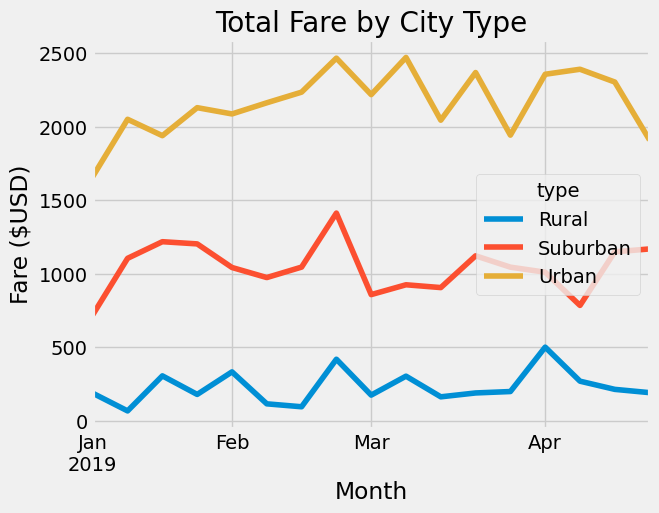

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
byweek.plot(ylabel="Fare ($USD)", title = "Total Fare by City Type",xlabel="Month")


